## GV: Trần Nhật Tân
## Email: tntan@csc.hcmus.edu.

## Bài 1: Tổng quan Data Pre-processing
************************

1. Data Pre-processing ?
    * Là 1 kỹ thuật khai thác dữ liệu (data mining) bao gồm chuyển đổi dữ liệu thô -> dễ hiểu, có thể sử dụng được. # không đủ, không nhất quán, thiếu, xu hướng chứa nhiều lỗi
    * phương pháp chứng minh để giải quyết các vấn đề về dữ liệu
    
https://www.wintellect.com/data-science-data-science-process/

2. Why Pre-processing ?<br>
Dữ liệu trong thế giới thực:
    * Inaccurate data/ missing data. thiếu các giá rị thuộc tính hoặc chỉ chứa dữ liệu tổng hợp, Có nhiều lý do dẫn đến viêc thiếu dữ liệu như không được thu thập liên tuc, sai sót trong việc nhập dữ liệu
    * Dữ liệu nhiễu (noisy data): Dữ liệu sai, ngoại lệ (outlier). 
    * Inconsistent data: Nguyên nhân do tồn tại dữ liệu trùng lắp do người nhập liệu, vi phạm các ràng buộc dữ liệu.
 
 Các phương pháp thu nhập dữ liệu thường được kiểm soát lỏng lẻo, dẫn đến các giá trị phạm vị (out of range value).
 Ex: tuổi -30, kêt hợp dữ liệu không phù hợp. Giới tính Nam, Mang thai: có, missing value
 
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('Diemthi_thpt_quocgia_2016.xlsx')

In [3]:
data

,SOBAODANH,HO_TEN,NGAY_SINH,TEN_CUMTHI,GIOI_TINH,DIEM_THI
0,018000001,DƯƠNG VIỆT AN,12/03/1998,Sở GDĐT Bắc Giang,Nam,Toán: 2.00 Ngữ văn: 5.50 Lịch sử: 3....
1,018000002,ĐỖ VĂN AN,09/12/1998,Sở GDĐT Bắc Giang,Nam,Toán: 5.50 Ngữ văn: 5.25 Địa lí: 5.5...
2,018000003,ĐỖ XUÂN AN,12/08/1997,Sở GDĐT Bắc Giang,Nam,Toán: 4.50 Ngữ văn: 5.50 Địa lí: 3.7...
3,018000004,ĐẶNG PHÚC AN,19/03/1998,Sở GDĐT Bắc Giang,Nữ,Toán: 3.00 Ngữ văn: 6.00 Địa lí: 5.5...
4,018000005,ĐẶNG VĂN AN,25/10/1998,Sở GDĐT Bắc Giang,Nam,Toán: 2.25 Ngữ văn: 4.75 Địa lí: 5.2...
...,...,...,...,...,...,...
34821,HUI014539,VÒNG NGỌC YẾN,15/05/1998,Trường Đại học Công nghiệp Tp. HCM,Nữ,Toán: 0.75 Ngữ văn: 5.00 Hóa học: 4....
34822,HUI014540,VÒNG THANH YẾN,09/09/1998,Trường Đại học Công nghiệp Tp. HCM,Nữ,Toán: 4.75 Ngữ văn: 5.75 Vật lí: 6.8...
34823,HUI014541,VŨ THỊ BẢO YẾN,19/05/1998,Trường Đại học Công nghiệp Tp. HCM,Nữ,Toán: 4.00 Ngữ văn: 5.50 Vật lí: 5.6...
34824,HUI014542,VŨ THỊ YẾN,13/01/1998,Trường Đại học Công nghiệp Tp. HCM,Nữ,Toán: 5.75 Ngữ văn: 6.00 Vật lí: 7.4...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34826 entries, 0 to 34825
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SOBAODANH   34826 non-null  object
 1   HO_TEN      34826 non-null  object
 2   NGAY_SINH   34826 non-null  object
 3   TEN_CUMTHI  34826 non-null  object
 4   GIOI_TINH   34826 non-null  object
 5   DIEM_THI    34826 non-null  object
dtypes: object(6)
memory usage: 1.6+ MB


In [5]:
data.head()

,SOBAODANH,HO_TEN,NGAY_SINH,TEN_CUMTHI,GIOI_TINH,DIEM_THI
0,018000001,DƯƠNG VIỆT AN,12/03/1998,Sở GDĐT Bắc Giang,Nam,Toán: 2.00 Ngữ văn: 5.50 Lịch sử: 3....
1,018000002,ĐỖ VĂN AN,09/12/1998,Sở GDĐT Bắc Giang,Nam,Toán: 5.50 Ngữ văn: 5.25 Địa lí: 5.5...
2,018000003,ĐỖ XUÂN AN,12/08/1997,Sở GDĐT Bắc Giang,Nam,Toán: 4.50 Ngữ văn: 5.50 Địa lí: 3.7...
3,018000004,ĐẶNG PHÚC AN,19/03/1998,Sở GDĐT Bắc Giang,Nữ,Toán: 3.00 Ngữ văn: 6.00 Địa lí: 5.5...
4,018000005,ĐẶNG VĂN AN,25/10/1998,Sở GDĐT Bắc Giang,Nam,Toán: 2.25 Ngữ văn: 4.75 Địa lí: 5.2...


In [6]:
data['DIEM_THI']

0        Toán:   2.00   Ngữ văn:   5.50   Lịch sử:   3....
1        Toán:   5.50   Ngữ văn:   5.25   Địa lí:   5.5...
2        Toán:   4.50   Ngữ văn:   5.50   Địa lí:   3.7...
3        Toán:   3.00   Ngữ văn:   6.00   Địa lí:   5.5...
4        Toán:   2.25   Ngữ văn:   4.75   Địa lí:   5.2...
                               ...                        
34821    Toán:   0.75   Ngữ văn:   5.00   Hóa học:   4....
34822    Toán:   4.75   Ngữ văn:   5.75   Vật lí:   6.8...
34823    Toán:   4.00   Ngữ văn:   5.50   Vật lí:   5.6...
34824    Toán:   5.75   Ngữ văn:   6.00   Vật lí:   7.4...
34825    Toán:   2.50   Ngữ văn:   4.25   Vật lí:   4.2...
Name: DIEM_THI, Length: 34826, dtype: object

In [7]:
test_str = 'Toán:   1.75   Ngữ văn:   5.25   Địa lí:   4.75   Tiếng Anh:   1.75'
test_str = test_str.replace(':', '')
test_str = test_str.split('   ')

In [8]:
test_str[::2]

['Toán', 'Ngữ văn', 'Địa lí', 'Tiếng Anh']

In [9]:
test_str[1::2]

['1.75', '5.25', '4.75', '1.75']

In [10]:
data_raw = data['DIEM_THI'].str.replace(':', '').str.split('   ')

In [11]:
data_raw

0        [Toán, 2.00, Ngữ văn, 5.50, Lịch sử, 3.00, Địa...
1        [Toán, 5.50, Ngữ văn, 5.25, Địa lí, 5.50, Tiến...
2        [Toán, 4.50, Ngữ văn, 5.50, Địa lí, 3.75, Tiến...
3        [Toán, 3.00, Ngữ văn, 6.00, Địa lí, 5.50, Tiến...
4        [Toán, 2.25, Ngữ văn, 4.75, Địa lí, 5.25, Tiến...
                               ...                        
34821    [Toán, 0.75, Ngữ văn, 5.00, Hóa học, 4.80, Sin...
34822    [Toán, 4.75, Ngữ văn, 5.75, Vật lí, 6.80, Hóa ...
34823    [Toán, 4.00, Ngữ văn, 5.50, Vật lí, 5.60, Tiến...
34824    [Toán, 5.75, Ngữ văn, 6.00, Vật lí, 7.40, Hóa ...
34825    [Toán, 2.50, Ngữ văn, 4.25, Vật lí, 4.20, Hóa ...
Name: DIEM_THI, Length: 34826, dtype: object

In [12]:
columns_Toan = []
columns_NguVan = []
columns_Diali = []
columns_TiengAnh = []
columns_Sinhhoc = []
columns_Vatli = []
columns_Hoahoc = []
columns_Lichsu = []
mon_hoc = ['Toán', 'Ngữ văn','Địa lí','Tiếng Anh','Sinh học', 'Vật lí','Hóa học', 'Lịch sử']
columns_monhoc = [columns_Toan, columns_NguVan, columns_Diali, columns_TiengAnh, columns_Sinhhoc, columns_Vatli, columns_Hoahoc, columns_Lichsu]
print(mon_hoc)

['Toán', 'Ngữ văn', 'Địa lí', 'Tiếng Anh', 'Sinh học', 'Vật lí', 'Hóa học', 'Lịch sử']


In [13]:
for index in range(len(mon_hoc)):
    for i in data_raw:
        try:
            index_row = i.index(mon_hoc[index])
            columns_monhoc[index].append(i[index_row + 1])
        except:
            columns_monhoc[index].append(np.nan)

In [14]:
for index in range(len(mon_hoc)):
    data[mon_hoc[index]] = columns_monhoc[index] 

In [15]:
data

,SOBAODANH,HO_TEN,NGAY_SINH,TEN_CUMTHI,GIOI_TINH,DIEM_THI,Toán,Ngữ văn,Địa lí,Tiếng Anh,Sinh học,Vật lí,Hóa học,Lịch sử
0,018000001,DƯƠNG VIỆT AN,12/03/1998,Sở GDĐT Bắc Giang,Nam,Toán: 2.00 Ngữ văn: 5.50 Lịch sử: 3....,2.00,5.50,5.00,NaN,NaN,NaN,NaN,3.00
1,018000002,ĐỖ VĂN AN,09/12/1998,Sở GDĐT Bắc Giang,Nam,Toán: 5.50 Ngữ văn: 5.25 Địa lí: 5.5...,5.50,5.25,5.50,3.68,NaN,NaN,NaN,NaN
2,018000003,ĐỖ XUÂN AN,12/08/1997,Sở GDĐT Bắc Giang,Nam,Toán: 4.50 Ngữ văn: 5.50 Địa lí: 3.7...,4.50,5.50,3.75,2.25,NaN,NaN,NaN,NaN
3,018000004,ĐẶNG PHÚC AN,19/03/1998,Sở GDĐT Bắc Giang,Nữ,Toán: 3.00 Ngữ văn: 6.00 Địa lí: 5.5...,3.00,6.00,5.50,1.50,NaN,NaN,NaN,NaN
4,018000005,ĐẶNG VĂN AN,25/10/1998,Sở GDĐT Bắc Giang,Nam,Toán: 2.25 Ngữ văn: 4.75 Địa lí: 5.2...,2.25,4.75,5.25,2.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34821,HUI014539,VÒNG NGỌC YẾN,15/05/1998,Trường Đại học Công nghiệp Tp. HCM,Nữ,Toán: 0.75 Ngữ văn: 5.00 Hóa học: 4....,0.75,5.00,NaN,NaN,5.20,NaN,4.80,NaN
34822,HUI014540,VÒNG THANH YẾN,09/09/1998,Trường Đại học Công nghiệp Tp. HCM,Nữ,Toán: 4.75 Ngữ văn: 5.75 Vật lí: 6.8...,4.75,5.75,NaN,3.33,4.60,6.80,4.60,NaN
34823,HUI014541,VŨ THỊ BẢO YẾN,19/05/1998,Trường Đại học Công nghiệp Tp. HCM,Nữ,Toán: 4.00 Ngữ văn: 5.50 Vật lí: 5.6...,4.00,5.50,NaN,3.60,NaN,5.60,NaN,NaN
34824,HUI014542,VŨ THỊ YẾN,13/01/1998,Trường Đại học Công nghiệp Tp. HCM,Nữ,Toán: 5.75 Ngữ văn: 6.00 Vật lí: 7.4...,5.75,6.00,NaN,2.88,NaN,7.40,4.80,NaN


In [37]:
data['Toán'] = data['Toán'].astype(float)

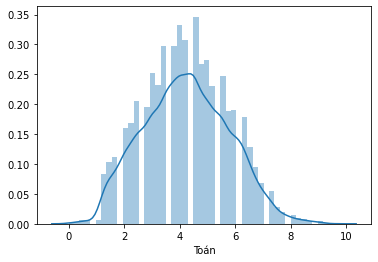

In [41]:
sns.distplot(data['Toán'].dropna())

# cach 2: Regular Expression



In [20]:
import re

In [22]:
data2 = pd.read_excel('Diemthi_thpt_quocgia_2016.xlsx')

In [23]:
diem = data2.loc[0, 'DIEM_THI']

In [24]:
diem

'Toán:   2.00   Ngữ văn:   5.50   Lịch sử:   3.00   Địa lí:   5.00'

In [25]:
sample = r'Toán:\s\s\s\d+.\d+'

In [30]:
result = re.search(sample, diem)
a = result.group().partition(':   ')

In [31]:
a

('Toán', ':   ', '2.00')

In [34]:
for mon in mon_hoc:
    data2['DIEM_THI'] = data2['DIEM_THI'].str.extract(f'({mon}:\s\s\s\d+.\d+)', expand=True)[0].str.split(':   ', expand=True)[1]

KeyError: 1

In [35]:
mon = 'Toán'
data2['DIEM_THI'].str.extract(f'({mon}:\s\s\s\d+.\d+)', expand=True)

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
34821,NaN
34822,NaN
34823,NaN
34824,NaN


In [36]:
data2['DIEM_THI']

0        2.00
1        5.50
2        4.50
3        3.00
4        2.25
         ... 
34821    0.75
34822    4.75
34823    4.00
34824    5.75
34825    2.50
Name: DIEM_THI, Length: 34826, dtype: object